# Step 1: Data Loding and Understanding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the csv files
cars= pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\cars_trucks_and_buses_per_1000_persons.csv")
co2=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\co2_emissions_tonnes_per_person.csv")
coal=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\coal_consumption_per_cap.csv")
ele_gen=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\electricity_generation_per_person.csv")
ele_use=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\electricity_use_per_person.csv")
forest=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\forest_coverage_percent.csv")
hydro=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\hydro_power_generation_per_person.csv")
income=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
industry=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\industry_percent_of_gdp.csv")
natural=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\natural_gas_production_per_person.csv")
oil_con=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\oil_consumption_per_cap.csv")
oil_pro=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\oil_production_per_person.csv")
year=pd.read_csv("C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\yearly_co2_emissions_1000_tonnes.csv")

FileNotFoundError: [Errno 2] File b'C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\cars_trucks_and_buses_per_1000_persons.csv' does not exist: b'C:\\Users\\NAMAN\\Desktop\\MLass\\co2_prediction\\cars_trucks_and_buses_per_1000_persons.csv'

In [ ]:
cars.head()

,geo,2002,2003,2004,2005,2006,2007
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,22.8
1,Albania,73.0,NaN,85.0,87.5,97.3,102.0
2,Algeria,NaN,88.0,89.0,91.0,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,39.6
4,Argentina,NaN,NaN,NaN,NaN,NaN,314.0


In [ ]:
co2.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [ ]:
coal.head()

,geo,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.0013,0.00146,...,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458,0.00361,0.00356
1,Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.0291,0.03010,...,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460,0.03130,0.02410
2,Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.5700,1.61000,...,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000,1.85000,1.82000
3,Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.5270,0.52200,...,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700,0.37300,0.36400
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017,0.00004,0.00004


In [ ]:
ele_gen.head()

,geo,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,544.0,559.0,532.0,568.0,607.0,621.0,653.0,673,699,...,1090,1150,1220,1270,1440,1530,1560,1640,1730,1730
1,Argentina,1490.0,1590.0,1660.0,1670.0,1580.0,1560.0,1620.0,1680,1810,...,2880,3190,3180,3210,3110,3230,3280,3290,3350,3350
2,Australia,7860.0,8100.0,8360.0,8670.0,9020.0,9130.0,9150.0,9230,9350,...,11600,11500,11500,11300,11400,11000,10800,10500,10600,10600
3,Austria,5850.0,5860.0,6610.0,6400.0,6530.0,6530.0,6620.0,6540,6670,...,7800,8030,8250,8450,7780,8500,7930,7540,7480,7760
4,Azerbaijan,3110.0,3180.0,3320.0,3360.0,3270.0,3200.0,3170.0,2630,2520,...,2500,2450,2110,2070,2220,2480,2490,2600,2570,2570


### Seeing above files we are sure that all of our files would have been read properly so no need to head all of them

### We see that all of our columns are years and country name and we need only year 2014 and counry name so we will drop other years

In [ ]:
co22=co2[['geo','2014']]
coal2=coal[['geo','2014']]
ele_gen2=ele_gen[['geo','2014']]
ele_use2=ele_use[['geo','2014']]
forest2=forest[['geo','2014']]
income2=income[['geo','2014']]
industry2=industry[['geo','2014']]
natural2=natural[['geo','2014']]
oil_con2=oil_con[['geo','2014']]
oil_pro2=oil_pro[['geo','2014']]
year2=year[['geo','2014']]

## Reading above data we find that cars and hydro do not have column for 2014 so we will not be using these files

In [ ]:
# Now checking first 3 files for first 5 rows
co22.head()


,geo,2014
0,Afghanistan,0.299
1,Albania,1.960
2,Algeria,3.720
3,Andorra,5.830
4,Angola,1.290


In [ ]:
coal2.head()


,geo,2014
0,Algeria,0.00458
1,Argentina,0.03460
2,Australia,1.82000
3,Austria,0.34700
4,Azerbaijan,0.00017


In [ ]:
ele_gen2.head()

,geo,2014
0,Algeria,1640
1,Argentina,3290
2,Australia,10500
3,Austria,7540
4,Azerbaijan,2600


In [ ]:
# Checking for missing values
year2.isnull().sum()

geo     0
2014    0
dtype: int64

### Hence we sucessfuly dropped waste columns.

# Our next step will be to merge these files using geo as our common column

In [ ]:
df1 = pd.merge(co22, coal2, how='outer', on='geo')
df2 = pd.merge(df1,ele_gen2, how='outer', on='geo')
df3 = pd.merge(df2, ele_use2, how='outer', on='geo')
df4 = pd.merge(df3, forest2,  how='outer', on='geo')
df5 = pd.merge(df4, income2,  how='outer', on='geo')
df6 = pd.merge(df5, industry2,  how='outer', on='geo')
df7 = pd.merge(df6, natural2, how='outer', on='geo')
df8 = pd.merge(df7, oil_con2, how='outer', on='geo')
df9 = pd.merge(df8, oil_pro2, how='outer', on='geo')
df = pd.merge(df9, year2, how='outer', on='geo')
df.head()

,geo,2014_x,2014_y,2014_x,2014_y,2014_x,2014_y,2014_x,2014_y,2014_x,2014_y,2014
0,Afghanistan,0.299,NaN,NaN,NaN,2.07,1780.0,21.10,NaN,NaN,NaN,9810.0
1,Albania,1.960,NaN,NaN,2310.0,28.20,10700.0,21.50,NaN,NaN,NaN,5720.0
2,Algeria,3.720,0.00458,1640.0,1360.0,0.82,13500.0,42.30,1.92,0.452,1.76,145000.0
3,Andorra,5.830,NaN,NaN,NaN,34.00,44900.0,9.91,NaN,NaN,NaN,462.0
4,Angola,1.290,NaN,NaN,312.0,46.50,6260.0,NaN,NaN,NaN,3.08,34800.0


In [ ]:
df.columns

Index(['geo', '2014_x', '2014_y', '2014_x', '2014_y', '2014_x', '2014_y',
       '2014_x', '2014_y', '2014_x', '2014_y', '2014'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of              geo  2014_x   2014_y  2014_x  2014_y  2014_x   2014_y  2014_x  \
0    Afghanistan   0.299      NaN     NaN     NaN    2.07   1780.0   21.10   
1        Albania   1.960      NaN     NaN  2310.0   28.20  10700.0   21.50   
2        Algeria   3.720  0.00458  1640.0  1360.0    0.82  13500.0   42.30   
3        Andorra   5.830      NaN     NaN     NaN   34.00  44900.0    9.91   
4         Angola   1.290      NaN     NaN   312.0   46.50   6260.0     NaN   
..           ...     ...      ...     ...     ...     ...      ...     ...   
189        Yemen   0.865      NaN     NaN   216.0    1.04   3770.0   44.00   
190       Zambia   0.288      NaN     NaN   707.0   65.70   3630.0   32.90   
191     Zimbabwe   0.780      NaN     NaN   537.0   37.20   1910.0   22.50   
192   San Marino     NaN      NaN     NaN     NaN    0.00  39100.0     NaN   
193       Monaco     NaN      NaN     NaN     NaN     NaN  58300.0     NaN   

     2014_y  2014_x  2014_y  

In [ ]:
# Now renaming our columns
df.columns=[ "geo","co2","coal","ele_gen","ele_use","forest","income","industry","natural","oil_con","oil_pro","year"]
df.head()

,geo,co2,coal,ele_gen,ele_use,forest,income,industry,natural,oil_con,oil_pro,year
0,Afghanistan,0.299,NaN,NaN,NaN,2.07,1780.0,21.10,NaN,NaN,NaN,9810.0
1,Albania,1.960,NaN,NaN,2310.0,28.20,10700.0,21.50,NaN,NaN,NaN,5720.0
2,Algeria,3.720,0.00458,1640.0,1360.0,0.82,13500.0,42.30,1.92,0.452,1.76,145000.0
3,Andorra,5.830,NaN,NaN,NaN,34.00,44900.0,9.91,NaN,NaN,NaN,462.0
4,Angola,1.290,NaN,NaN,312.0,46.50,6260.0,NaN,NaN,NaN,3.08,34800.0


In [ ]:
df.shape

(194, 12)

# Step 2: Data Cleaning and Manipulation

In [ ]:
# Checking for missing values
df.isnull().sum()

geo           0
co2           2
coal        129
ele_gen     129
ele_use      57
forest        3
income        1
industry     11
natural     145
oil_con     129
oil_pro     145
year          2
dtype: int64

In [ ]:
#Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

geo          0.00
co2          1.03
coal        66.49
ele_gen     66.49
ele_use     29.38
forest       1.55
income       0.52
industry     5.67
natural     74.74
oil_con     66.49
oil_pro     74.74
year         1.03
dtype: float64

### As we can see:
coal        66.49

ele_gen     66.49

natural     74.74

oil_con     66.49

oil_pro     74.74

### These have more than 50% of missing values. So there is no need to consider them.
### Whereas,
co2          1.03

forest       1.55

income       0.52

industry     5.67

year         1.03

ele_use     29.38

### So, we will be filling it with mean.

In [ ]:
# Dropping useless columns
df = df.drop(['coal','ele_gen','natural','oil_con','oil_pro'], axis=1)


In [ ]:
df['co2'].mean()

4.44008489583333

In [ ]:
df['co2'].fillna(value = (df['co2'].mean()), inplace=True)

In [ ]:
df['forest'].mean()

31.907068062827214

In [ ]:
df['forest'].fillna(value = (df['forest'].mean()), inplace=True)

In [ ]:
df['income'].mean()

17210.39896373057

In [ ]:
df['income'].fillna(value = (df['income'].mean()), inplace=True)

In [ ]:
df['industry'].mean()

26.761092896174873

In [ ]:
df['industry'].fillna(value = (df['industry'].mean()), inplace=True)

In [ ]:
df['year'].mean()

175992.54166666666

In [ ]:
df['year'].fillna(value = (df['year'].mean()), inplace=True)

In [ ]:
df['ele_use'].mean()

4253.62189781022

In [ ]:
df['ele_use'].fillna(value = (df['ele_use'].mean()), inplace=True)

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

geo         0
co2         0
ele_use     0
forest      0
income      0
industry    0
year        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 7 columns):
geo         194 non-null object
co2         194 non-null float64
ele_use     194 non-null float64
forest      194 non-null float64
income      194 non-null float64
industry    194 non-null float64
year        194 non-null float64
dtypes: float64(6), object(1)
memory usage: 12.1+ KB


In [ ]:
df.columns

Index(['geo', 'co2', 'ele_use', 'forest', 'income', 'industry', 'year'], dtype='object')

## Hence, we managed all the missing values and manipulated the data.

# Step 3: Data Visualisation

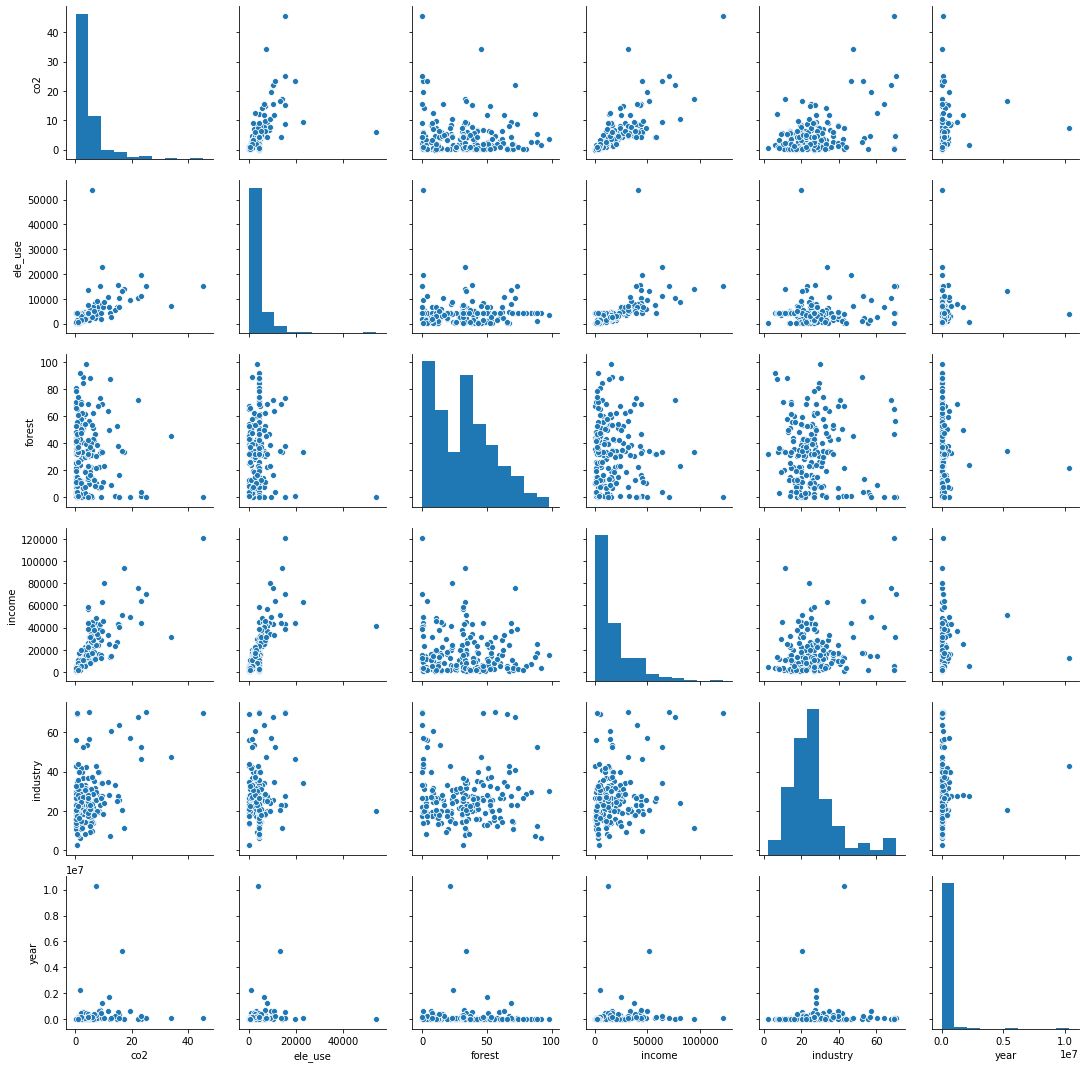

In [ ]:
# Visualizing our data
sns.pairplot(df)
plt.show()

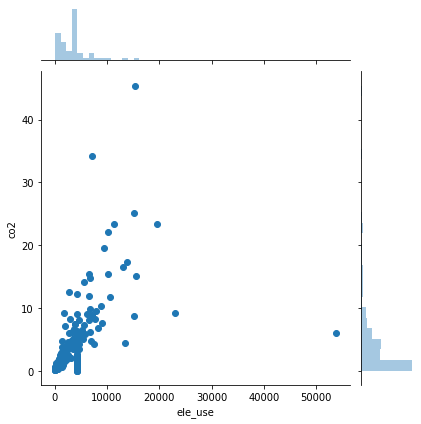

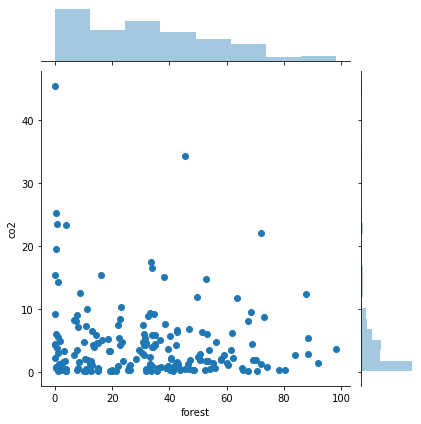

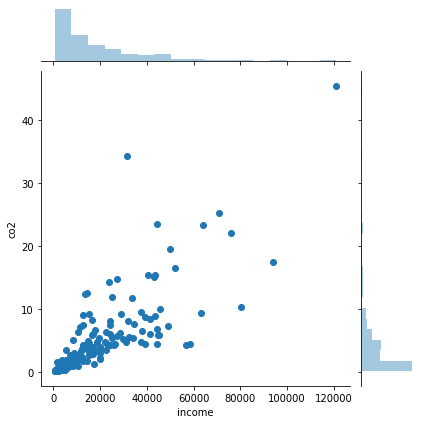

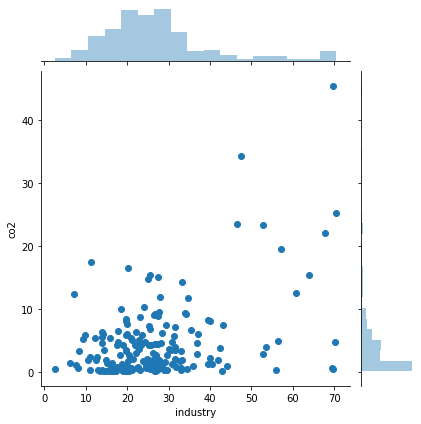

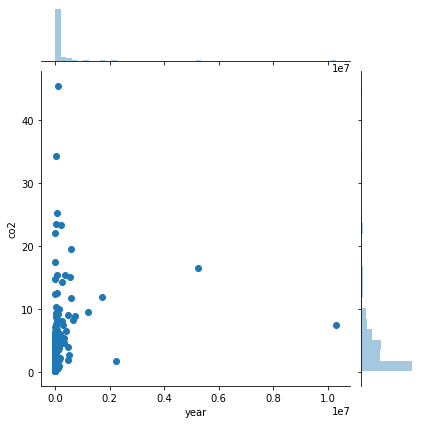

In [ ]:
sns.jointplot('ele_use', 'co2', df)
plt.show()
sns.jointplot('forest', 'co2', df)
plt.show()
sns.jointplot('income', 'co2', df)
plt.show()
sns.jointplot('industry', 'co2', df)
plt.show()
sns.jointplot('year', 'co2', df)
plt.show()

## Now treating the outliers

In [ ]:
#treating outliers
df=df[(df.ele_use<50000)]
df=df[(df.income<100000)]

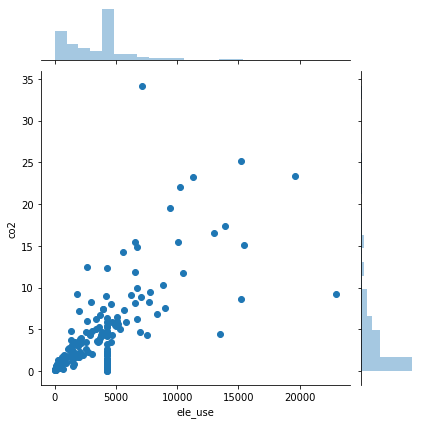

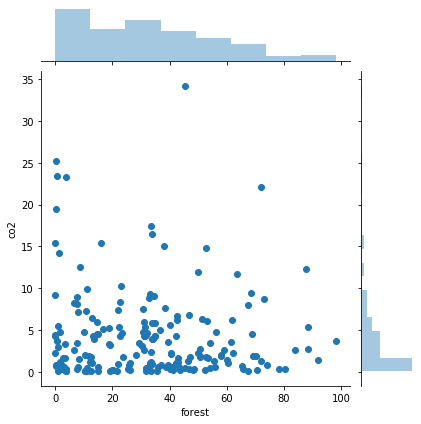

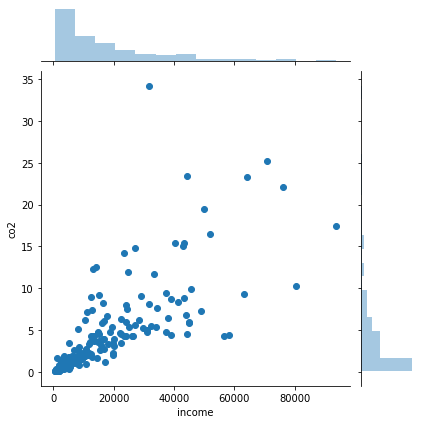

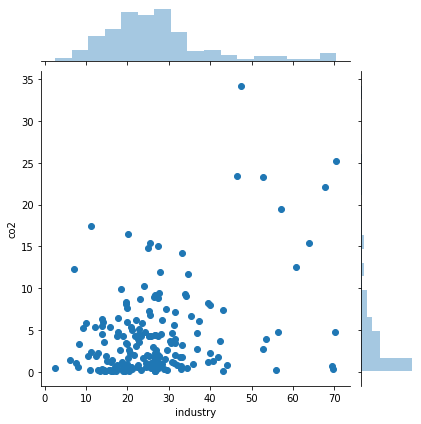

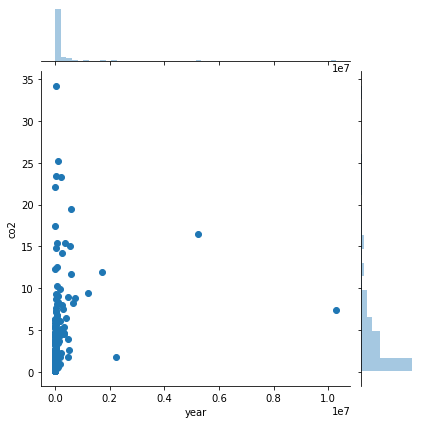

In [ ]:
sns.jointplot('ele_use', 'co2', df)
plt.show()
sns.jointplot('forest', 'co2', df)
plt.show()
sns.jointplot('income', 'co2', df)
plt.show()
sns.jointplot('industry', 'co2', df)
plt.show()
sns.jointplot('year', 'co2', df)
plt.show()

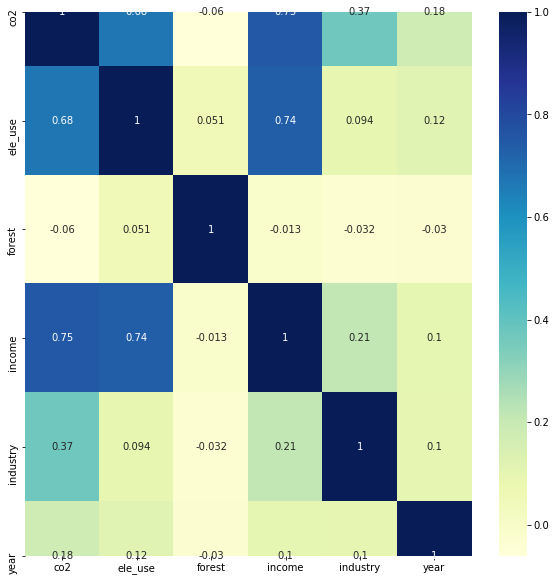

In [ ]:
# Now checking the correlation of our data
#Checking the correlation of our target variable with other variables
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 4: Data Prepration

In [ ]:
# Splitting our data into target and independent variables
x= df.drop(['geo','co2'], axis=1)
x.head()

,ele_use,forest,income,industry,year
0,4253.621898,2.07,1780.0,21.100000,9810.0
1,2310.000000,28.20,10700.0,21.500000,5720.0
2,1360.000000,0.82,13500.0,42.300000,145000.0
3,4253.621898,34.00,44900.0,9.910000,462.0
4,312.000000,46.50,6260.0,26.761093,34800.0


In [ ]:
y=df['co2']
y.head()

0    0.299
1    1.960
2    3.720
3    5.830
4    1.290
Name: co2, dtype: float64

In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols
x.columns

Index(['ele_use', 'forest', 'income', 'industry', 'year'], dtype='object')

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Step 5:Model Building and Evaluation

## Using lasso regression

In [ ]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001995,0.000630,0.001196,0.000400,0.0001,{'alpha': 0.0001},-1.623682,-3.279831,-1.624474,-1.333355,...,-1.956006,0.689874,11,-1.830952,-1.554343,-1.858919,-1.921112,-1.820559,-1.797177,0.126355
1,0.001799,0.000401,0.000802,0.000401,0.001,{'alpha': 0.001},-1.623824,-3.275315,-1.624223,-1.332923,...,-1.954905,0.688222,10,-1.830825,-1.554067,-1.858865,-1.920939,-1.820418,-1.797023,0.126410
2,0.001601,0.000494,0.000594,0.000485,0.01,{'alpha': 0.01},-1.625448,-3.229997,-1.621260,-1.328440,...,-1.943776,0.671714,9,-1.829355,-1.551512,-1.858268,-1.919779,-1.819191,-1.795621,0.126982
3,0.001203,0.000396,0.001010,0.000017,0.05,{'alpha': 0.05},-1.632663,-3.033372,-1.610551,-1.308513,...,-1.900400,0.600549,5,-1.823159,-1.541201,-1.857235,-1.916898,-1.814183,-1.790535,0.129775
4,0.001590,0.000497,0.000604,0.000493,0.1,{'alpha': 0.1},-1.643105,-2.799111,-1.602886,-1.283604,...,-1.850652,0.517916,1,-1.819592,-1.529288,-1.856786,-1.916549,-1.811250,-1.786693,0.133954


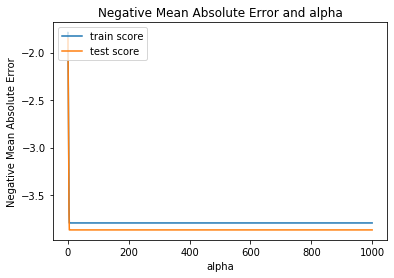

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001995,0.000630,0.001196,0.000400,0.0001,{'alpha': 0.0001},-1.623682,-3.279831,-1.624474,-1.333355,...,-1.956006,0.689874,11,-1.830952,-1.554343,-1.858919,-1.921112,-1.820559,-1.797177,0.126355
1,0.001799,0.000401,0.000802,0.000401,0.0010,{'alpha': 0.001},-1.623824,-3.275315,-1.624223,-1.332923,...,-1.954905,0.688222,10,-1.830825,-1.554067,-1.858865,-1.920939,-1.820418,-1.797023,0.126410
2,0.001601,0.000494,0.000594,0.000485,0.0100,{'alpha': 0.01},-1.625448,-3.229997,-1.621260,-1.328440,...,-1.943776,0.671714,9,-1.829355,-1.551512,-1.858268,-1.919779,-1.819191,-1.795621,0.126982
3,0.001203,0.000396,0.001010,0.000017,0.0500,{'alpha': 0.05},-1.632663,-3.033372,-1.610551,-1.308513,...,-1.900400,0.600549,5,-1.823159,-1.541201,-1.857235,-1.916898,-1.814183,-1.790535,0.129775
4,0.001590,0.000497,0.000604,0.000493,0.1000,{'alpha': 0.1},-1.643105,-2.799111,-1.602886,-1.283604,...,-1.850652,0.517916,1,-1.819592,-1.529288,-1.856786,-1.916549,-1.811250,-1.786693,0.133954
5,0.001787,0.000393,0.000800,0.000400,0.2000,{'alpha': 0.2},-1.664726,-2.788482,-1.595334,-1.249518,...,-1.850810,0.521968,2,-1.826272,-1.562404,-1.866415,-1.922907,-1.814078,-1.798415,0.123971
6,0.001987,0.000622,0.000793,0.000396,0.3000,{'alpha': 0.3},-1.686347,-2.820155,-1.595072,-1.229531,...,-1.865700,0.538489,3,-1.845640,-1.573389,-1.891985,-1.954398,-1.819268,-1.816936,0.130133
7,0.001795,0.000974,0.001003,0.000013,0.4000,{'alpha': 0.4},-1.712886,-2.881626,-1.598727,-1.212327,...,-1.886659,0.563956,4,-1.871217,-1.586422,-1.921465,-1.995483,-1.821121,-1.839142,0.138882
8,0.001773,0.000404,0.000408,0.000500,0.5000,{'alpha': 0.5},-1.749590,-2.914875,-1.586006,-1.200614,...,-1.901766,0.579408,6,-1.890187,-1.599154,-1.938238,-2.030967,-1.829055,-1.857520,0.145072
9,0.001569,0.000490,0.000806,0.000403,0.6000,{'alpha': 0.6},-1.786293,-2.930292,-1.581472,-1.186564,...,-1.915678,0.589113,7,-1.911782,-1.612424,-1.950911,-2.048291,-1.840942,-1.872870,0.146444


In [ ]:
lasso = Lasso(alpha = 0.1) 
lasso.fit(X_train, y_train) 
Y_pred1 = lasso.predict(X_train) 

#Printing Lasso Coefficients
print('Lasso Coefficients',lasso.coef_,sep='\n')
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((Y_pred1 - y_train)**2) 
print("Mean squared error on train set", mean_squared_error) 

Y_pred2 = lasso.predict(X_test) 
mean_squared_error1 = np.mean((Y_pred2 - y_test)**2) 

print("Mean squared error on test set", mean_squared_error1)

Lasso Coefficients
[ 2.508523   -0.29428438  2.02843619  1.34395783  0.20211723]
Mean squared error on train set 9.293386945837502
Mean squared error on test set 10.99298676683838


### Mean square error on test set almost equal train set